# Pandas学习

In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

## pandas数据结构介绍
有两个主要数据结构，Series和DataFrame。为大多数应用提供了解决

In [ ]:
obj = Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

Series的字符串表现形式是：索引在左边，值在右边。如果没有特定的数据指引索引，会自动创建一个数组型索引。可以通过Series的values和index属性获取其数组表示形式和索引对象

In [ ]:
obj2 = Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [ ]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [ ]:
obj2['a']

-5

In [ ]:
obj2['d'] = 6

In [ ]:
obj2[['c', 'a', 'd']]

c    3
a   -5
d    6
dtype: int64

与普通NumPy数组相比，你可以通过索引的方式选取Series中的的那个或一组值：

Numpy数组运算（如根据布尔型数组进行过滤、标量乘法、应用数学函数）都会保留索引和值之间的链接

In [ ]:
obj2

d    6
b    7
a   -5
c    3
dtype: int64

In [ ]:
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [ ]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [ ]:
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

这里看来series数据结构有点像带指定索引的ndarray

还可以将Series看成是一个定长的有序字典，因为它是索引值到数据值的一个映射。它可以用在许多原本需要紫电参数的函数中：

In [ ]:
'b' in obj2

True

In [ ]:
'e' in obj2

False

如果数据被存放在一个Python字典中，也可以通过这个字典创建Series

In [ ]:
sdata = {'Ohio': 35000, 'Texas':71000, 'Oregon':16000, 'Uath':5000}
obj3 = Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Uath       5000
dtype: int64

如果只传入一个字典，则结果Series中的索引就是原字典的键（有序序列）

In [ ]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

缺失值表示为NaN(即非数字)，在pandas它用于表示缺失或NA值。我们使用missing或NA表示缺失数据。Pandas的isnull和notnull函数可以用于检测缺失数据：

In [ ]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [ ]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [ ]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [ ]:
obj4.notnull()

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

Series有一个重要功能：在算数运算中会自动对齐不用索引的数据的数据

In [ ]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Uath       5000
dtype: int64

In [ ]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [ ]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Uath               NaN
dtype: float64

### name属性，该属性跟pandas其他的关键功能非常密切

In [ ]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

Series的索引可以通过赋值的方法就地修改

In [ ]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

## DataFrame

表格型数据结构，它含有**一组**有序的**列**，每列可以使不同的值型。DataFrame既有行索引也有列索引，它可以被看做由Series组成的字典（共用同一个索引）。跟其他类似的数据结构想不，比如R的data.frame，DataFrame中面向行和面向列的操作基本上是平衡的。其实,DataFrame中的数据是以一个或者多个二维块存放的（而不是列表、字典或别的一维数据结构）。有关DataFrame的内部技术细节很复杂，不表.

### DataFrame的构建

In [ ]:
data = {'state':['Ohio', 'Ohio', 'Ohio', 'Navada', 'Navada'],
        'year':[2000, 2001, 2002, 2001, 2002],
        'pop':[1.5, 1.7, 3.6, 2.4, 2.9 ]}
frame = DataFrame(data)

In [ ]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Navada,2001,2.4
4,Navada,2002,2.9


DataFrame会自动加上索引，且全部列会被有序排列

如果指定了列序列，则DataFrame的列就会按照指定顺序排列。

In [ ]:
DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Navada,2.4
4,2002,Navada,2.9


如果传入的列在数据中找不到，就会产生NA值：

In [ ]:
frame2 = DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                   index=['one', 'two', 'three', 'four', 'five'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Navada,2.4,NaN
five,2002,Navada,2.9,NaN


In [ ]:
print(frame2.columns)

Index(['year', 'state', 'pop', 'debt'], dtype='object')


In [ ]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Navada
five     Navada
Name: state, dtype: object

In [ ]:
frame2.__dict__

{'_attrs': {}, '_is_copy': None, '_item_cache': {'state': one        Ohio
  two        Ohio
  three      Ohio
  four     Navada
  five     Navada
  Name: state, dtype: object}, '_mgr': BlockManager
 Items: Index(['year', 'state', 'pop', 'debt'], dtype='object')
 Axis 1: Index(['one', 'two', 'three', 'four', 'five'], dtype='object')
 FloatBlock: slice(2, 3, 1), 1 x 5, dtype: float64
 IntBlock: slice(0, 1, 1), 1 x 5, dtype: int64
 ObjectBlock: slice(1, 5, 2), 2 x 5, dtype: object}

In [ ]:
frame.year

0    2000
1    2001
2    2002
3    2001
4    2002
Name: year, dtype: int64

In [ ]:
frame.values

array([['Ohio', 2000, 1.5],
       ['Ohio', 2001, 1.7],
       ['Ohio', 2002, 3.6],
       ['Navada', 2001, 2.4],
       ['Navada', 2002, 2.9]], dtype=object)

列可以通过复制的方式修改。例如可以给debt列赋值一个标量或者一组值

In [ ]:
frame2['debt'] = 16.5

In [ ]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Navada,2.4,16.5
five,2002,Navada,2.9,16.5


In [ ]:
frame['debt'] = np.arange(5.)
frame

,state,year,pop,debt
0,Ohio,2000,1.5,0.0
1,Ohio,2001,1.7,1.0
2,Ohio,2002,3.6,2.0
3,Navada,2001,2.4,3.0
4,Navada,2002,2.9,4.0


将列表或数组赋值给某个列时，其长度必须与DataFrame的长度相匹配

如果是一个Series，就会精确匹配到DataFrame的索引，所有的空位都将被填上缺失值

In [ ]:
val = Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])

In [ ]:
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Navada,2.4,-1.5
five,2002,Navada,2.9,-1.7


In [ ]:
val = Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
print(val)
frame2['debt'] = val
print(frame2)

two    -1.2
four   -1.5
five   -1.7
dtype: float64
       year   state  pop  debt
one    2000    Ohio  1.5   NaN
two    2001    Ohio  1.7  -1.2
three  2002    Ohio  3.6   NaN
four   2001  Navada  2.4  -1.5
five   2002  Navada  2.9  -1.7


为不存在的列赋值会创建出新列。关键字del用于删除列：

In [ ]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Navada,2.4,-1.5,False
five,2002,Navada,2.9,-1.7,False


In [ ]:
del frame2['eastern']

In [ ]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

> 警告：通过索引方式返回的列只是相应数据的视图，并不是副本。因此对返回的Series所做的任何就地修改都会反映源到DataFrame上。通过Series的copy方法可以显式地复制列

In [ ]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Navada,2.4,-1.5
five,2002,Navada,2.9,-1.7


In [ ]:
to_change = frame2['year']
to_change = 1
print(to_change)
print(frame2)

1
       year   state  pop  debt
one    2000    Ohio  1.5   NaN
two    2001    Ohio  1.7  -1.2
three  2002    Ohio  3.6   NaN
four   2001  Navada  2.4  -1.5
five   2002  Navada  2.9  -1.7


另一种常见的数据形式是嵌套字典，也就是字典的字典

In [ ]:
pop = {'Nevada':{2001:2.4, 2002:2.9},
       'Ohio':{2000:1.5, 2001:1.7, 2002:3.6}}
frame3 = DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [ ]:
DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


### 可以输入给**DataFrame构造器**的数据、
+ 二维ndarray：数据矩阵，还可以传入行标，列标
+ 由数组、列标或元组组成的字典：每个序列会变成DataFrame的一列。所有序列长度必须相同
+ Numpy的结构化/记录数组：类似于"由数组组成的字典"
+ 由Series组成的字典：每个Series会成为一列。如果没有显式指定索引，则各Series的索引会被合并成结果的行索引
+ 由字典组成的字典：各内层字典会成为一列。建会被合并成结果的行索引
+ 字典或Series的列表：各项成为DataFrame的一行，字典键或者Series的索引的并集成为DataFrame的列标。
+ 由列表或元素组成的列表：类似二维ndarray
+ 另一个DataFrame：该DataFrame的索引会被沿用，除非显式指定其他索引
+ Numpy的MaskerArray：类似于“二维ndarray”，只是掩码值在结果DataFrame会变成NA/缺失值

如果设置了DataFrame的index和columns的name属性，则这些信息也会显示

In [ ]:
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [ ]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Navada', 2.4, -1.5],
       [2002, 'Navada', 2.9, -1.7]], dtype=object)

## 索引对象

pandas的索引对象负责管理轴标签和其他元数据（比如轴名称等）。构建Series或DataFrame时，所用到的任何数组或其他序列的标签都会被转换成一个index：

In [ ]:
obj = Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [ ]:
index[1:]

Index(['b', 'c'], dtype='object')

Index对象是不能修改（immutable）的

In [ ]:
#index[1] = d

不可修改性很重要，因为这样才能使Index对象在多个数据结构之间安全共享

In [ ]:
index = pd.Index(np.arange(3))
obj2 = Series([1.5, -2.5, 0], index=index)
obj2.index is index

True

### Pandas中的主要Index对象

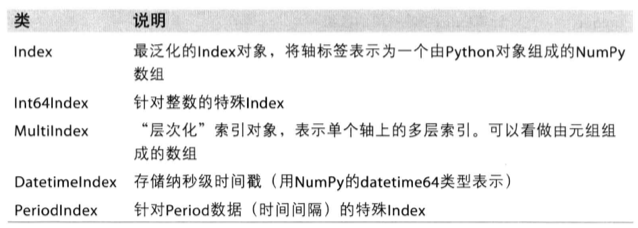

除了长得像数组，Index的功能也类似一个固定大小的集合

In [ ]:
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [ ]:
'Ohio' in frame3.columns

True

In [ ]:
2003 in frame3.index

False

In [ ]:
print(frame3.index.name)
print(frame3.columns.name)

year
state


每个索引都有一些方法和属性，它们可用于设置逻辑并回答有关该索引所包含的数据的常见问题。下表列出了这些函数


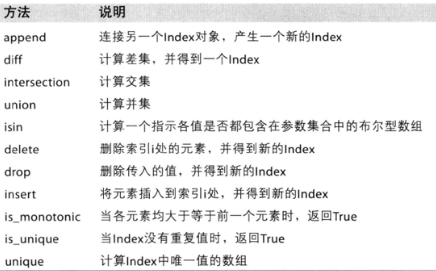

# 基本功能


## 重新索引
一个重要方法是reindex，其作用是创建一个适应新索引的新对象。以之前的一个简单示例来说

In [ ]:
obj = Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [ ]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [ ]:
obj.reindex(['a', 'b', 'c', 'd', 'e'], fill_value=0)

a   -5.3
b    7.2
c    3.6
d    4.5
e    0.0
dtype: float64

对于时间序列这样的有序数据，重新索引时可能需要做一些差值处理。method选项即可达到此目的，例如，使用ffill可以实现**前向值填充**：

In [ ]:
obj3 = Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

reindex的插值method选项
+ ffill或pad 前向填充值
+ bfill或backfill 后向填充值

对于DataFrame,reindex可以修改行索引、列，或者两个都修改。如果仅传入一个序列，则会重新索引行。

reindex不是原地修改，而是返回新的表

In [ ]:
frame = DataFrame(np.arange(9).reshape((3,3)), index=['a', 'b', 'c'], columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
b,3,4,5
c,6,7,8


In [ ]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,3.0,4.0,5.0
c,6.0,7.0,8.0
d,NaN,NaN,NaN


使用columns关键字即可重新索引列

In [ ]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
b,4,NaN,5
c,7,NaN,8


可以同时对行和列进行重新索引，而插值则只能按行索引（即轴0）

In [ ]:
frame.reindex(index=['a', 'b', 'c', 'd'])

,Ohio,Texas,California
a,0.0,1.0,2.0
b,3.0,4.0,5.0
c,6.0,7.0,8.0
d,NaN,NaN,NaN


In [ ]:
frame#可以看出原DataFrame没变

,Ohio,Texas,California
a,0,1,2
b,3,4,5
c,6,7,8


## loc与iloc

loc是根据具体的索引Selection by Label函数，

iloc的i是integer，接受整数索引。

In [ ]:
frame.loc['a':'c', :]

,Ohio,Texas,California
a,0,1,2
b,3,4,5
c,6,7,8


In [ ]:
frame.loc[['a','c'], :]

,Ohio,Texas,California
a,0,1,2
c,6,7,8


In [ ]:
frame.iloc[0:2, 0:2]

,Ohio,Texas
a,0,1
b,3,4


## 算数运算和数据对齐
pandas的一个重要功能是，他可以对不同的索引的对象进行算术运算。**将对象相加时，如果存在不同的索引对，则结果的索引对就是该索引对的并集。**

In [ ]:
s1 = Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])
print(s1)
print(s2)

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64
a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64


自动的数据对齐操作在不重叠的索引处引入了NA值。缺失值会在算术运算过程中传播

对于DataFrame，对齐操作会同时发生在行和列上：

In [ ]:
df1 = DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                index=['Ohio', 'Texas', 'Colorado'])
df2 = DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                index=['Utah', 'Ohio','Texas', 'Oregon'])
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


可以看出，把他们相加后会返回一个新的DataFrame，其索引和列为原来的两个DataFrame的并集

### 在算术方法中填充值
不同索引的对象算术运算时，希望一个对象某个轴标签在另一个对象中找不到时填充一个特殊值（比如0）

In [ ]:
df1 = DataFrame(np.arange(12.).reshape((3,4)), columns=list('abcd'))
df2 = DataFrame(np.arange(20.).reshape((4,5)), columns=list('abcde'))

In [ ]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [ ]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [ ]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


与此类似，对Series和DataFrame使用reindex时也可以指定一个填充值

In [ ]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


### 灵活的算术方法
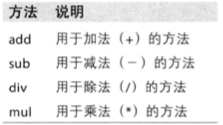

## DataFrame和Series之间的运算

二者之间的运算有明确的规定

In [ ]:
arr = np.arange(12.).reshape((3, 4))
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [ ]:
arr[0]

array([0., 1., 2., 3.])

In [ ]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

可以看出，这个也广播了

In [ ]:
frame = DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.iloc[0]
print(frame)
print(series)

          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0
b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64


默认情况下，DataFrame和Series之间的算术运算会将Series的索引匹配到DataFrame的列，然后沿着行一直向下传播：

In [ ]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


如果某个索引值在DataFrame的列或者Series的索引中找不到，则重新索引形成并集

In [ ]:
series2 = Series(range(3), index=['b', 'e', 'f'])
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


如果希望匹配行且在列上广播，则必须使用**算术运算方法**（such as add, sub, divide, mul）

In [ ]:
series3 = frame['d']
print(frame, '\n', series3)

          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0 
 Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64


In [ ]:
frame.sub(series3, axis=0)

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


传入的轴就是希望匹配的轴号。在本例中，我们的目的是匹配DataFrame的行索引并进行广播

## 函数应用和映射

Numpy的ufuncs(元素级数组方法)，也可用于操作pandas对象，

In [ ]:
frame = DataFrame(np.random.randn(4,3), columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,-0.475353,0.411228,-0.094178
Ohio,-1.301739,0.520320,0.177941
Texas,0.332401,-0.514782,-1.759132
Oregon,1.293316,0.207587,0.823894


In [ ]:
np.abs(frame)

,b,d,e
Utah,0.475353,0.411228,0.094178
Ohio,1.301739,0.520320,0.177941
Texas,0.332401,0.514782,1.759132
Oregon,1.293316,0.207587,0.823894


另一个常见操作是，将函数应用到由各列或行所形成的一维数组上。DataFrame的apply可以实现这个功能：

In [ ]:
f = lambda x: x.max() - x.min()
frame.apply(f)

b    2.595056
d    1.035102
e    2.583025
dtype: float64

In [ ]:
frame.apply(f, axis=1)

Utah      0.886580
Ohio      1.822059
Texas     2.091532
Oregon    1.085729
dtype: float64

许多最为常见的数组统计功能都被实现成DataFrame方法，如sum, mean。因此无需使用apply方法

除标量值外，传递给apply的函数还可以返回多个值组成的series

In [ ]:
frame

,b,d,e
Utah,-0.475353,0.411228,-0.094178
Ohio,-1.301739,0.520320,0.177941
Texas,0.332401,-0.514782,-1.759132
Oregon,1.293316,0.207587,0.823894


In [ ]:
def f(x):
    return Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f, axis=1)

,min,max
Utah,-0.475353,0.411228
Ohio,-1.301739,0.520320
Texas,-1.759132,0.332401
Oregon,0.207587,1.293316


applymap方法能把函数应用到元素级别

In [ ]:
format = lambda x:'%.2f' % x
frame.applymap(format)

,b,d,e
Utah,-0.48,0.41,-0.09
Ohio,-1.30,0.52,0.18
Texas,0.33,-0.51,-1.76
Oregon,1.29,0.21,0.82


In [ ]:
frame['e'].map(format)

Utah      -0.09
Ohio       0.18
Texas     -1.76
Oregon     0.82
Name: e, dtype: object

## 排序和排名
根据条件对数据集排序也是一种重要的内置运算。要对行或列索引进行排序（字典排序），可以使用**sort_index**方法，它将返回一个已排序的新对象

In [ ]:
obj = Series(range(4), index=list('dabc'))
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

而对于DataFrame，则可以根据任意一个轴上的索引进行排序

In [ ]:
frame = DataFrame(np.arange(8).reshape((2,4)), index=['three', 'one'],
                  columns=list('dabc'))
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [ ]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [ ]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


数据默认是按升序的，但也可以降序排序

In [ ]:
 frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


若要按值对Series进行排序，可使用其sort_values()方法。

In [ ]:
obj = Series([4, 7, -3, 2])
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

在DataFrame上，你可能希望根据一个或多个列的值进行排序。使用sort_values方法并将一个或多个列的名字传递给by选项即可达到该目的

In [ ]:
frame = DataFrame({'b':[4,7,-3,2],
                   'a':[0,1,0,-1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,-1


In [ ]:
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,-1
0,4,0
1,7,1


In [ ]:
frame.sort_index(axis=1).sort_values(by=['a', 'b'])

,a,b
3,-1,2
2,0,-3
0,0,4
1,1,7


排名（ranking）跟排序关系密切，且它会增设一个排名值（从1开始，一直到数组中有效数据的数量）。它跟numpy.argsort产生的间接排序索引差不多，只不过它可以根据某种规则破坏评级关系。

Series和DataFrame的rank方法，默认情况下为每组分配一个平均排名

In [ ]:
obj = Series([7, -5, 7, 4, 2, 0, 4])

In [ ]:
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

也可以根据值在原数据中出现的顺序给出排名

In [ ]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

降序排名

In [ ]:
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

DataFrame可以在行或列上计算排名：

In [ ]:
frame = DataFrame({'b':[4.3, 7, -3, 2],
                   'a':[0, 1, 0, 1],
                   'c':[-2, 5, 8, -2.5]})
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [ ]:
frame.rank(axis=1)

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


### 排名时用于破坏平级关系的method选项
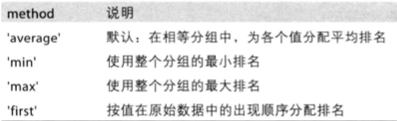

In [ ]:
frame.rank(method='average')

,b,a,c
0,3.0,1.5,2.0
1,4.0,3.5,3.0
2,1.0,1.5,4.0
3,2.0,3.5,1.0


In [ ]:
frame.rank(method='min')

,b,a,c
0,3.0,1.0,2.0
1,4.0,3.0,3.0
2,1.0,1.0,4.0
3,2.0,3.0,1.0


In [ ]:
frame.rank(method='max')

,b,a,c
0,3.0,2.0,2.0
1,4.0,4.0,3.0
2,1.0,2.0,4.0
3,2.0,4.0,1.0


## 带有重复值的轴索引

直到目前为止，所有范例都有唯一的轴标签。虽然许多pandas函数（如reindex）都要求标签唯一，但并不是强制性的。

In [ ]:
obj = Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

索引的is_unique属性可以告诉你它的值是否是唯一的

In [ ]:
obj.index.is_unique

False

对于带有重复值的索引，数据选取的行为将会有些不同。如果某个索引对应多个值，则返回一个Series；而对应单个值的则返回一个标量值。

In [ ]:
obj['a']

a    0
a    1
dtype: int64

In [ ]:
obj['c']

4

对DataFrame的行进行索引时也是如此：

In [ ]:
df = DataFrame(np.random.randn(4,3), index=['a', 'a', 'b', 'b'])

In [ ]:
df

,0,1,2
a,-0.386461,0.161164,-0.392246
a,-1.402831,-1.723629,-0.578818
b,-0.001337,-0.191017,-0.271158
b,0.187658,1.152181,-0.540213


In [ ]:
df.loc['b']

,0,1,2
b,-0.001337,-0.191017,-0.271158
b,0.187658,1.152181,-0.540213


# 汇总和计算描述统计

pandas对象拥有一组常用的数学和统计方法。它们大部分都输入约简和汇总统计，用于从Series中提取单个值（如sum或mean）或从DataFrame的行或列中提取一个Series。跟对应的Numpy数组方法相比，他们都是基于没有缺失数据的假设而构建的

In [ ]:
df = DataFrame([[1.4, np.nan],[7.1, -4.5],
                [np.nan, np.nan], [0.75, -1.3]],
               index=['a', 'b', 'c', 'd'],
               columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [ ]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [ ]:
df.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [ ]:
df.mean(axis=1)

a    1.400
b    1.300
c      NaN
d   -0.275
dtype: float64

NA值会自动被排除，除非整个切片都是NA，通过skipna选项可以禁用该功能

In [ ]:
df.mean(axis=1, skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

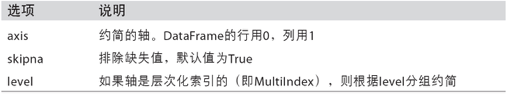

有些方法按返回的是间接统计（idxmin和idxmax）

In [ ]:
df.idxmax()

one    b
two    d
dtype: object

有一些方法返回的是累计型：

In [ ]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


还有一种方法，它既不是约简型也不是累计型。describd就是一个例子，它用于一次性产生多个汇总统计

In [ ]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


对于非数值型数据，describe会产生另外一种汇总统计：

In [ ]:
obj = Series(['a', 'a', 'b', 'c']*4)
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

方法|说明
:--|:--
count|非NA值得数量
describe|针对Series或各DataFrame列计算汇总统计
min,max|计算最小值最大值
argmin,argmax|计算最大值最小值的索引位置（整数）
idxmin,idxmax|计算能够获取到最大值最小值的索引值
quantile|计算样本的分位数（0到1）
sum|值的总和
mean|
median|算术中位数
mad|根据平均值计算平均绝对误差
var|样本值的方差
std|样本值的标准差
skew|样本值的偏度（三阶矩）
kurt|样本值的峰值（四阶矩）
cumsum|累积和
cummin,cummax|累计最大值和累计最小值
cumprod|样本的累计积
diff|计算一阶差分
pct_change|计算百分比变化


有些汇总统计（如相关系数和协方差）是通过参数对计算出来的。我们来看几个DataFrame

In [ ]:
!pip install pandas-datareader

In [ ]:
import pandas_datareader as web

all_data = {}

for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']:
    all_data[ticker] = web.get_data_yahoo(ticker, '1/1/2000', '1/1/2010')

price = DataFrame({tic: data['Adj Close']
                   for tic, data in all_data.items()})
volume = DataFrame({tic: data['Volume']
                    for tic, data in all_data.items()})

接下来计算价格的百分数的变化

In [ ]:
returns = price.pct_change()
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2009-12-24,0.034340,0.004385,0.002587,0.011117
2009-12-28,0.012294,0.013326,0.005484,0.007098
2009-12-29,-0.011861,-0.003477,0.007058,-0.005571
2009-12-30,0.012147,0.005461,-0.013699,0.005376
2009-12-31,-0.004300,-0.012597,-0.015504,-0.004416


Series的corr方法用于计算Series中重叠的、非NA的、按索引对齐的值的相关系数。cov用于计算协方差

下面计算MSFT和IBM的相关系数

In [ ]:
returns.MSFT.corr(returns.IBM)

0.4959797652275992

In [ ]:
returns.MSFT.cov(returns.IBM)

0.00021595764520058794

DataFrame的corr和cov方法将以DataFrame的形式返回完整的相关系数或协方差矩阵：

In [ ]:
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.410011,0.424305,0.470676
IBM,0.410011,1.000000,0.495980,0.390689
MSFT,0.424305,0.495980,1.000000,0.443586
GOOG,0.470676,0.390689,0.443586,1.000000


In [ ]:
returns.cov()

,AAPL,IBM,MSFT,GOOG
AAPL,0.001027,0.000252,0.000309,0.000303
IBM,0.000252,0.000367,0.000216,0.000142
MSFT,0.000309,0.000216,0.000516,0.000205
GOOG,0.000303,0.000142,0.000205,0.000580


In [ ]:
returns.corrwith(returns.IBM)

AAPL    0.410011
IBM     1.000000
MSFT    0.495980
GOOG    0.390689
dtype: float64

In [ ]:
returns.corrwith(volume)

AAPL   -0.057549
IBM    -0.007892
MSFT   -0.014245
GOOG    0.062648
dtype: float64

传入axis=1则按行进行计算。无论如何，在计算相关系数之前，所有的数据项都会按标签对齐

## 唯一值、值计数以及成员资格

unique方法，类似set()

In [ ]:
obj = Series(['c', 'a', 'd', 'a', 'a', 'a', 'b', 'b', 'c', 'c', 'c'])
obj

0     c
1     a
2     d
3     a
4     a
5     a
6     b
7     b
8     c
9     c
10    c
dtype: object

In [ ]:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

返回的唯一值是未排序的，如果需要的话可以对结果再次进行排序（uniques.sour()）。value_counts用于计算一个Series中各值出现的频率：

In [ ]:
obj.value_counts()

c    4
a    4
b    2
d    1
dtype: int64

为了便于查看，结果Series是按频率降序排列的，value_counts还是一个顶级pandas方法，可用于任何数组或序列

In [ ]:
pd.value_counts(obj.values, sort=False)

b    2
a    4
c    4
d    1
dtype: int64

isin，用于判断矢量化集合的成员资格。可用于选取Series中或DataFrame列中数据的子集：


In [ ]:
mask = obj.isin(['b', 'c'])
mask

0      True
1     False
2     False
3     False
4     False
5     False
6      True
7      True
8      True
9      True
10     True
dtype: bool

In [ ]:
obj[mask]

0     c
6     b
7     b
8     c
9     c
10    c
dtype: object

In [ ]:
frame = DataFrame(np.arange(9).reshape((3,3)))
frame

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8


In [ ]:
mask = frame.isin([0, 2])

In [ ]:
frame[mask]

,0,1,2
0,0.0,NaN,2.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN


唯一值、值计数、成员资格方法

In [ ]:
data = DataFrame({'Qu1':[1, 3, 4, 3, 4],
                  'Qu2':[2, 3, 1, 2, 3],
                  'Qu3':[1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [ ]:
data.value_counts()#一个层次化的

Qu1  Qu2  Qu3
4    3    4      1
     1    2      1
3    3    5      1
     2    4      1
1    2    1      1
dtype: int64

 将panda.value_counts传给DataFrame的apply函数，就会出现：


In [ ]:
result = data.apply(pd.value_counts).fillna(0)

In [ ]:
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


## 处理缺失数据
missing data在大部分数据分析应用中都很常见。pandas的设计目标之一就是让确实数据的处理任务尽量轻松。例如，pandas对象上的所有描述统计都排除了缺失数据

pandas使用浮点值NaN表示浮点和非浮点数组中的缺失数据。

In [ ]:
string_data = Series(['aardvark', 'artichoke', np.nan, np.nan, 'avocado'])
string_data

0     aardvark
1    artichoke
2          NaN
3          NaN
4      avocado
dtype: object

None值也会被当做NA处理

In [ ]:
string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3     True
4    False
dtype: bool

### NA处理方法
方法|说明
:--|:--
dropna|根据各标签值中是否存在缺失数据对轴标签进行过滤，可通过阈值调节对缺失值的容忍度
fillna|用指定值或插值方法（如ffill或bfill）填充缺失数据
isnull|返回一个含bool值的对象，这些bool值表示哪些是缺失值，该对象的类型与源类型一样
notnull|isnull的否定式

## 滤除缺失数据

对于一个**series**，dropna返回一个仅含非空数据和索引值的Series

In [ ]:
from numpy import nan as NA
data = Series([1, NA, 3.5, NA, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

也可以通过bool型索引达到该目的

In [ ]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

而对于DataFrame事情会复杂一些。你可能希望丢弃带有NA的行或者列。

In [ ]:
data = DataFrame([[1., 6.5, 3.], [1., NA, NA],
                 [NA, NA, NA], [NA, 6.5, 3.]])
cleaned = data.dropna()
display(data)
display(cleaned)

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


,0,1,2
0,1.0,6.5,3.0


In [ ]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [ ]:
data[4] = NA

In [ ]:
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [ ]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


另一个滤除DataFrame行的问题涉及时间序列数据。假设你只想留下一部分观测数据，可以用thresh参数实现此目的：

In [ ]:
df = DataFrame(np.random.randn(7, 3))
df.iloc[:4,1] = NA
df.iloc[:2,2] = NA
df

,0,1,2
0,-0.964703,NaN,NaN
1,0.668888,NaN,NaN
2,0.021348,NaN,0.953739
3,-0.459398,NaN,0.636651
4,-1.741571,-1.320717,0.559535
5,0.296781,-0.062784,-1.536280
6,0.868018,0.703961,0.386455


In [ ]:
df.dropna(axis=0)

,0,1,2
4,-1.741571,-1.320717,0.559535
5,0.296781,-0.062784,-1.536280
6,0.868018,0.703961,0.386455


thresh表示该轴最少有多少个非缺失值

In [ ]:
df.dropna(thresh=2)

,0,1,2
2,0.021348,NaN,0.953739
3,-0.459398,NaN,0.636651
4,-1.741571,-1.320717,0.559535
5,0.296781,-0.062784,-1.536280
6,0.868018,0.703961,0.386455


## 填充缺失数据
fillna方法是最主要的函数。通过一个常数调用fillna就会将缺失值替换为那个常数值:

In [ ]:
df.fillna(0)

,0,1,2
0,-0.964703,0.000000,0.000000
1,0.668888,0.000000,0.000000
2,0.021348,0.000000,0.953739
3,-0.459398,0.000000,0.636651
4,-1.741571,-1.320717,0.559535
5,0.296781,-0.062784,-1.536280
6,0.868018,0.703961,0.386455


若是通过字典调用fillna，就可以实现对不同的列填充不同的值

In [ ]:
df.fillna({1:0.5, 3:-1})

,0,1,2
0,-0.964703,0.500000,NaN
1,0.668888,0.500000,NaN
2,0.021348,0.500000,0.953739
3,-0.459398,0.500000,0.636651
4,-1.741571,-1.320717,0.559535
5,0.296781,-0.062784,-1.536280
6,0.868018,0.703961,0.386455


默认返回新对象，有时也可以就地修改。设置参数，inplace=True

In [ ]:
_ = df.fillna(0, inplace=True)
df

,0,1,2
0,-0.964703,0.000000,0.000000
1,0.668888,0.000000,0.000000
2,0.021348,0.000000,0.953739
3,-0.459398,0.000000,0.636651
4,-1.741571,-1.320717,0.559535
5,0.296781,-0.062784,-1.536280
6,0.868018,0.703961,0.386455


对reindex有效的插值方法（nethod= ffill）也可以用于fillna:

In [ ]:
df = DataFrame(np.random.randn(6, 3))
df.iloc[2:,1] = NA
df.iloc[4:,2] = NA
df

,0,1,2
0,-0.152062,-0.197969,0.331001
1,-0.578146,0.474117,-0.450706
2,-1.119661,NaN,-0.194937
3,0.757660,NaN,0.733547
4,0.262154,NaN,NaN
5,-0.513190,NaN,NaN


In [ ]:
df.fillna(method='ffill')

,0,1,2
0,-0.152062,-0.197969,0.331001
1,-0.578146,0.474117,-0.450706
2,-1.119661,0.474117,-0.194937
3,0.757660,0.474117,0.733547
4,0.262154,0.474117,0.733547
5,-0.513190,0.474117,0.733547


In [ ]:
df.fillna(method='ffill', limit=2)

,0,1,2
0,-0.152062,-0.197969,0.331001
1,-0.578146,0.474117,-0.450706
2,-1.119661,0.474117,-0.194937
3,0.757660,0.474117,0.733547
4,0.262154,NaN,0.733547
5,-0.513190,NaN,0.733547


是要稍微动动脑子，你就可以利用fillna实现许多别的功能。比如，可以传入Series的平均值或中位数。

In [ ]:
!speedtest

/bin/bash: speedtest: command not found


In [ ]:
data = Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

### fillna函数参数
参数|描述
:--|:--
value|标量值或字典型对象用于填充缺失值
method|插值方法，默认是ffill
axis|需要填充的轴
inplace|是否原地修改
limit|插值填充的最大范围

## 数据转换
由于各种原因，DataFrame中会出现重复行

In [ ]:
data = pd.DataFrame({'k1':['one', 'two']*3 + ['two'],
                     'k2':[1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [ ]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [ ]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [ ]:
data['v1'] = range(7)
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


keep都是默认保留第一个观测到的值，如果传入参数keep='last'，将会返回最后一个

In [ ]:
data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


In [ ]:
data.loc[data['k1'] == 'one']

,k1,k2,v1
0,one,1,0
2,one,2,2
4,one,3,4


### 使用函数或映射进行数据转换

对于许多数据集，你可能希望基于DataFrame中的数组、列或列中的数值进行一些转换，考虑下面这些收集到的关于肉类的假设数据

In [ ]:
data = DataFrame({'food':['bacon', 'pulled pork', 'bacon', 'Pastrami', 'corned beef', 'Bacon', 'pastrami', 'honey ham', 'nova lox'],
                  'ounces':[4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [ ]:
meat_to_animal = {
    'bacon': 'pig',
    'pulled pork': 'pig',
    'pastrami': 'cow',
    'corned beef': 'pig',
    'honey ham': 'pig',
    'nova lox': 'salmon'
}

Series的map方法接受一个函数或一个包含映射关系的字典型对象，这里的数据，有的大写了，有的小写了。因此我们需要使用Series的str.lower方法将每个值都转换为小写：

In [ ]:
lowercased = data['food'].str.lower()
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [ ]:
data['animal'] = lowercased.map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,pig
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


我们也可以传入一个能够完成所有工作的函数：

In [ ]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       pig
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

### 替代值

使用fillna填充缺失值是通用值替换的特殊案例。前面你已经看到，map可以用来修改一个对象中的子集的值，但是replace提供了更为简单灵活的实现。让我们考虑下面的Series

In [ ]:
data = Series([1., -999., 2., -999., -1000, 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

-999可能是缺失值的标识。如果要使用NA来替代这些值，我们可以使用replace方法生成新的Series（除非你传入了inpace=True）

In [ ]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

如果你想要一次替代多个值，你可以传入一个列表和替代值

In [ ]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [ ]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [ ]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

data.replace方法与data.str.replace方法是不同的，data.str.replace是对字符串进行按元素替代的。我们将在下一章看到Series的字符串方法。

### 重命名轴索引
和Series中的值一样，可以通过函数或某种形式的映射对轴标签进行类似的转换，生成新的且带有不同标签的对象。你也可以在不生成新的数据结构的情况下修改轴。

In [ ]:
data = DataFrame(np.arange(12).reshape((3,4)),
                 index=['Ohio', 'Colorado', 'New York'],
                 columns=['one', 'two', 'three', 'four'])
transform = lambda x:x[:4].upper()
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

你可以赋值给index，修改DataFrame

In [ ]:
data.index = data.index.map(transform)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


如果想要创建数据集转换之后的版本，并且不修改原有的数据集，有一个有用的方法是rename，也是提供字典或者函数。


In [ ]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


rename可以结合字典型对象使用为轴标签的子集提供新的值


In [ ]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three':'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


想要原地修改，则提供inplace参数，inplace=True

In [ ]:
data.rename(index={'OHIO': 'INDEIANA'}, inplace=True)#没有返回值

In [ ]:
data

,one,two,three,four
INDEIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


### 离散化和分箱

连续值经常需要离散化，或者分离成“箱子”进行分析。假设你有某项研究中一组人群的数据，你想将他们进行分组，放入离散的年龄框中：

In [ ]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41,32]

将这些年龄分成18-25、26-35，36-60，61-等若干组。为了实现这个，使用pandas中的cut：

In [ ]:
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [ ]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [ ]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

In [ ]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

如上面的Series小括号在左。小括号可以改为右，right=False

In [ ]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

可以通过向labels选项传递一个列表或数组来传入自定义的箱名

In [ ]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

如果你传给cut整数个箱来代替显式的箱边，pandas将根据数据中的最小值和最大值计算出等长的箱。请考虑一些均匀分布的数据被切成四份的情况

In [ ]:
data = np.random.rand(20)
pd.cut(data, 4, precision=2)

[(0.76, 0.99], (0.52, 0.76], (0.76, 0.99], (0.054, 0.29], (0.29, 0.52], ..., (0.76, 0.99], (0.29, 0.52], (0.76, 0.99], (0.29, 0.52], (0.054, 0.29]]
Length: 20
Categories (4, interval[float64]): [(0.054, 0.29] < (0.29, 0.52] < (0.52, 0.76] < (0.76, 0.99]]

qcut是一个与分箱密切相关的函数，它基于样本分位数进行分箱。取决于数据的分布，使用cut通常不会 使每个箱具有相同数据量

### 检测和过滤异常值

过滤或转换异常值在很大程度上是应用数组操作的事情。考虑一个具有正态分布数据的DataFrame

In [ ]:
data = pd.DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.040076,-0.011053,0.006703,0.008508
std,0.997528,1.027859,1.045360,0.955896
min,-3.518232,-3.437003,-3.083131,-3.151476
25%,-0.667482,-0.719338,-0.727488,-0.645193
50%,-0.064797,-0.008826,0.020752,0.040934
75%,0.599312,0.658373,0.728944,0.652362
max,3.229692,3.339792,3.280781,3.038694


假设你想要找出一列中绝对值大于三的值：

In [ ]:
col = data[2]
col[np.abs(col) > 3]

173    3.280781
356   -3.034488
542   -3.083131
980   -3.051996
Name: 2, dtype: float64

要选出所有值大于

In [ ]:
(np.abs(data)>3)

,0,1,2,3
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
995,False,False,False,False
996,False,False,False,False
997,False,False,False,False
998,False,False,False,False


any表示有就行，all表示必须全是

In [ ]:
data[(np.abs(data)>3).any(1)]

,0,1,2,3
173,0.501431,-0.460962,3.280781,-1.415856
191,-0.026823,-3.056769,-0.866553,-0.520733
292,-3.518232,-0.831808,-1.661435,1.738777
298,3.229692,1.389539,-0.210613,-0.384374
354,-1.152793,3.339792,-0.750043,1.186246
356,0.578866,-0.835796,-3.034488,-0.394374
388,-0.247227,0.010355,-0.481217,-3.151476
542,0.035436,-0.073640,-3.083131,-0.309983
672,0.223897,3.142920,-0.505309,-0.741159
761,0.456266,-3.073522,0.881577,1.569711


In [ ]:
data[np.abs(data) > 3] = np.sign(data) * 3
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.039563,-0.010968,0.006591,0.008621
std,0.993704,1.024624,1.044024,0.955284
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.667482,-0.719338,-0.727488,-0.645193
50%,-0.064797,-0.008826,0.020752,0.040934
75%,0.599312,0.658373,0.728944,0.652362
max,3.000000,3.000000,3.000000,3.000000


In [ ]:
np.sign(data).head()

,0,1,2,3
0,-1.0,1.0,1.0,1.0
1,-1.0,1.0,-1.0,1.0
2,1.0,-1.0,1.0,-1.0
3,1.0,1.0,1.0,1.0
4,-1.0,1.0,1.0,1.0


In [ ]:
# 选出一个不含有替代值的随机子集
df.sample(n=3)

,0,1,2
4,0.262154,NaN,NaN
2,-1.119661,NaN,-0.194937
5,-0.513190,NaN,NaN


In [ ]:
# 选一个带有替代值的样本，将replace=True传入
choices = pd.Series([5, 7, -1, 6, 4])
draws = choices.sample(n=10, replace=True)

In [ ]:
draws

1    7
1    7
1    7
2   -1
2   -1
3    6
3    6
2   -1
3    6
0    5
dtype: int64

### 计算指标/虚拟变量

In [3]:
df = DataFrame({'key':['b', 'b', 'a', 'c', 'a', 'b'],
                'data1':range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [6]:
dummies = pd.get_dummies(df['key'], prefix='key')
df_with_dummies = df[['data1']].join(dummies)
df_with_dummies

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [10]:
mnames = ['movied_id', 'title', 'genres']
movies = pd.read_table('pydata-notebook/datasets/movielens/movies.dat', sep='::',
                        header=None, names=mnames, encoding = "ISO-8859-1")
movies[:10]

,movied_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [11]:
all_genres  = []
for x in movies.genres:
    all_genres.extend(x.split('|'))
genres = pd.unique(all_genres)
genres

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

使用全0的DataFrame是构建指标DataFrame的一种方式：

In [13]:
zero_matrix = np.zeros((len(movies), len(genres)))
dummies = pd.DataFrame(zero_matrix, columns=genres)
dummies

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


遍历每一部电影，将相应条目标为1。以第一部电影为例

In [15]:
gen = movies.genres[0]
dummies.columns.get_indexer(gen.split('|'))

array([0, 1, 2])

In [16]:
for i, gen in enumerate(movies.genres):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1
dummies

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3881,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


add_prefix将列索引添加前缀，add_suffix添加前缀。

如果想修改行索引，则使用rename

In [21]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic

,movied_id,title,genres,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Adventure,Genre_Fantasy,Genre_Romance,Genre_Drama,...,Genre_Crime,Genre_Thriller,Genre_Horror,Genre_Sci-Fi,Genre_Documentary,Genre_War,Genre_Musical,Genre_Mystery,Genre_Film-Noir,Genre_Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,3949,Requiem for a Dream (2000),Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,3950,Tigerland (2000),Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3881,3951,Two Family House (2000),Drama,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
np.random.seed(12345)
values = np.random.rand(10)
values

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503,
       0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987])

get_dummies与cut等离散化函数结合使用。

In [23]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,0,0,1
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,0,0,1
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


In [24]:
data = {'Dave':'dave@google.com', 'steve':'steve@gmail.com',
        'Rob':'rob@gmail.com', 'Wes':np.nan}
data = pd.Series(data)
data

Dave     dave@google.com
steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [25]:
data.isnull()

Dave     False
steve    False
Rob      False
Wes       True
dtype: bool

In [26]:
data.str.contains('gmail')

Dave     False
steve     True
Rob       True
Wes        NaN
dtype: object

In [33]:
import re
pattern = '([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object